# Comprendiendo R-squared

## ¿Por Qué R-squared?
El Coeficiente de Determinación, conocido como R-squared, es una métrica ampliamente utilizada en estadística para medir la fuerza de la relación entre variables. Aunque frecuentemente se compara con el Coeficiente de Correlación de Pearson r, R-squared ofrece una interpretación más intuitiva y directa.

Pero ¿Por qué la necesidad del Coeficiente R-squared cuando ya se dispone del Coeficiente de Correlación r?

## La Relación entre R-squared y r

El R-squared, aunque similar a r, se distingue por su interpretación más directa. En el contexto de una regresión lineal, R-squared corresponde al cuadrado del Coeficiente de Correlación de Pearson r. Por ejemplo, un r estadísticamente significativo de 0,8 al cuadrado es 0,64, lo cual indica que la relación entre las dos variables explica el 64% de la variación en los datos. De forma similar, un r de 0,6 al cuadrado, que es 0,36, sugiere que la relación explica el 36% de la variación en los datos.

El Coeficiente R-squared es frecuentemente preferido sobre r por su claridad interpretativa. Consideremos un r de 0,8 en comparación con uno de 0,6. Al cuadrar estos valores para obtener R-squared, resulta que un R-squared de 0,64 explica el 64% de la variación original, mientras que un R-squared de 0,36 explica el 36%. Así, R-squared facilita la comprensión de que la primera correlación es aproximadamente 1,8 veces más explicativa que la segunda.

## Interpretando los Valores de R-squared

En un escenario donde se presenta un R-squared estadísticamente significativo de 0,85, se podría interpretar que la relación entre las dos variables explica el 85% de la variación en los datos. Por otro lado, un R-squared significativo de sólo 0,02 indica que, aunque la relación sea estadísticamente significativa, apenas explica el 2% de la variación en los datos, sugiriendo la influencia de otros factores en el restante 98%.

## Aplicando R-squared
Para ejemplificar la utilidad y el uso de R-scuared, se examina un conjunto de datos que ilustran la identificación, peso, altura y tiempo de traslado al trabajo de un grupo de individuos.

In [1]:
import pandas as pd
import numpy as np

np.random.seed(0)

n = 30
id = range(1, n + 1)
# https://www.eltiempo.com/archivo/documento/CMS-13128617
height = np.random.normal(172, 8, n)
# Body mass index (BMI)
# https://en.wikipedia.org/wiki/Body_mass_index
# weight = BMI * height^2
bmi = 26 + np.random.normal(0, 2.5, n)
weight = bmi * ((height/100) ** 2)
commute_time = np.random.uniform(15, 60, n)

data = pd.DataFrame({'ID': id, 'Height': height, 'Weight': weight, 'BMI': bmi, 'Commute Time': commute_time})
data.round(1)



,ID,Height,Weight,BMI,Commute Time
0,1,186.1,91.4,26.4,28.3
1,2,175.2,82.7,26.9,20.3
2,3,179.8,76.9,23.8,29.3
3,4,189.9,75.9,21.0,33.6
4,5,186.9,87.8,25.1,17.9
5,6,164.2,71.1,26.4,46.2
6,7,179.6,93.8,29.1,40.5
7,8,170.8,84.6,29.0,26.9
8,9,171.2,73.3,25.0,38.5
9,10,175.3,77.6,25.2,19.2


Primero, se grafica el peso de los individuos en el eje Y y los números de identificación en el eje X. Es posible calcular la media de los pesos y representarla como una línea horizontal en el gráfico. La variación de los datos alrededor de esta media se calcula sumando las diferencias al cuadrado (SS<sub>tot</sub>) entre el peso de cada individuo y la media. Las diferencias se elevan al cuadrado para asegurar que los valores por debajo de la media no contrarresten a los que están por encima

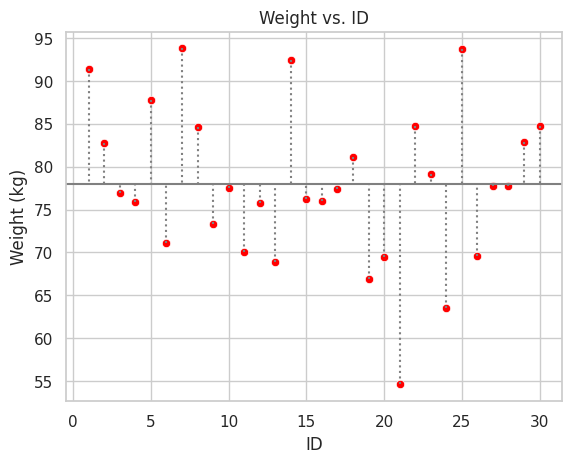

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")
weight_mean = data['Weight'].mean()
sns.scatterplot(x='ID', y='Weight', data=data, color='red')
plt.axhline(y=weight_mean, color='gray')
for i in range(n):
    plt.plot([data['ID'][i], data['ID'][i]], [data['Weight'][i], weight_mean], color='gray', linestyle=':')
plt.title('Weight vs. ID')
plt.xlabel('ID')
plt.ylabel('Weight (kg)')
plt.show()

Ahora, si en lugar de ordenar por el número de identificación, se ordenan por su altura, con el más bajo a la izquierda y el más alto a la derecha, la media y la variación siguen siendo las mismas que antes.

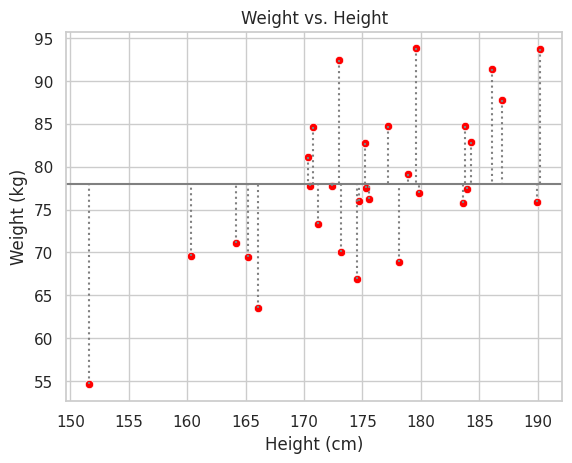

In [3]:
sns.scatterplot(x='Height', y='Weight', data=data, color='red')
plt.axhline(y=weight_mean, color='gray')
for i in range(n):
    plt.plot([data['Height'][i], data['Height'][i]], [data['Weight'][i], weight_mean], color='gray', linestyle=':')
plt.title('Weight vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

De esta manera, se plantea la siguiente cuestión: dados la altura y el peso de un individuo, ¿representa la media el predictor más eficaz del peso? La respuesta es negativa. Una predicción más precisa del peso se logra mediante la aplicación de una **línea** de ajuste a los datos.

## Mejorando la Predicción con Líneas de Ajuste
La aplicación de una línea de ajuste a los datos conlleva una mejora significativa en la predicción del peso de un individuo basándose en su altura. Por ejemplo, conociendo la altura de una persona, se puede emplear la línea de ajuste para estimar su peso con mayor exactitud.


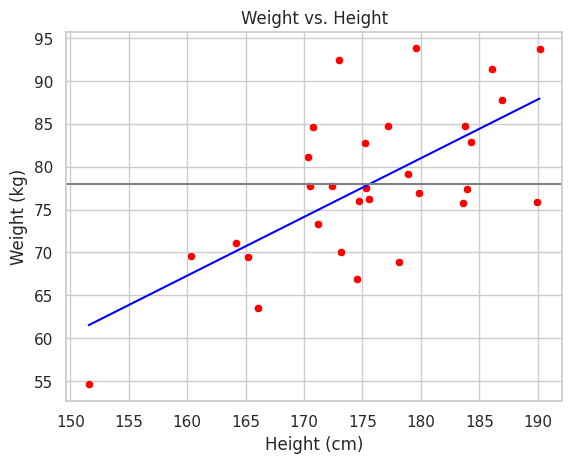

In [4]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(data[['Height']], data['Weight'])
weight_pred = model.predict(data[['Height']])

sns.scatterplot(x='Height', y='Weight', data=data, color='red')
sns.lineplot(x=data['Height'], y=weight_pred, color='blue')
plt.axhline(y=weight_mean, color='gray')
plt.title('Weight vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

De esta manera, se plantea una pregunta fundamental: ¿Supera el ajuste de la línea azul, recientemente trazada, al de la media en términos de precisión? Y de ser así, ¿en qué medida?

A primera vista, la línea azul parece ofrecer un mejor ajuste a los datos que la media. Para cuantificar esta mejora, se emplea R-squared.

$$ R^2 = \frac{\text{SS}_\text{tot} - \text{SS}_\text{res}}{\text{SS}_\text{tot}} $$

La ecuación de R-squared se formula como la proporción de la variación total menos la variación residual sobre la variación total. La primera parte de esta ecuación refleja la variación alrededor de la media, calculada como la suma de las diferencias al cuadrado entre los valores reales de los datos y la media de estos.

$$ \text{SS}_\text{tot} = \sum_{i=1}^{n} (y_i - \bar{y})^2 $$

Donde $y_i$ es el valor real del peso y $\bar{y}$ es la media del peso.

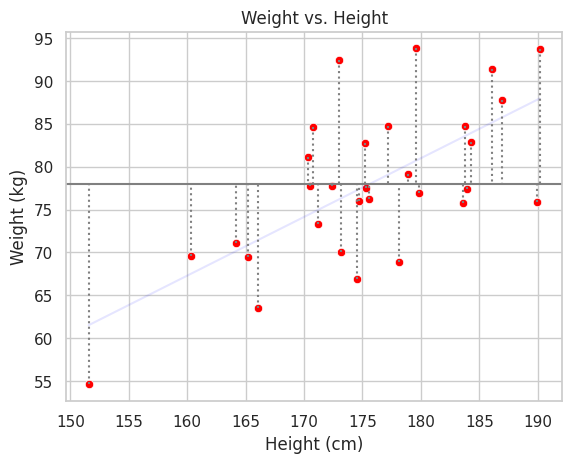

In [5]:
sns.scatterplot(x='Height', y='Weight', data=data, color='red')
sns.lineplot(x=data['Height'], y=weight_pred, color='blue', alpha=0.1)
plt.axhline(y=weight_mean, color='gray')
for i in range(n):
    plt.plot([data['Height'][i], data['Height'][i]], [data['Weight'][i], weight_mean], color='gray', linestyle=':')
plt.title('Weight vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

La segunda componente de la ecuación representa la variación alrededor de la línea azul. Esta parte de la ecuación cuantifica la variación residual, que es la suma de las diferencias al cuadrado entre los valores reales de los datos y los valores predichos por la línea ajustada.

$$ \text{SS}_\text{res} = \sum_{i=1}^{n} (y_i - \hat{y_i})^2 $$

Aquí, $y_i$ es el valor real del peso y $\hat{y_i}$ es el valor predicho por la línea azul.


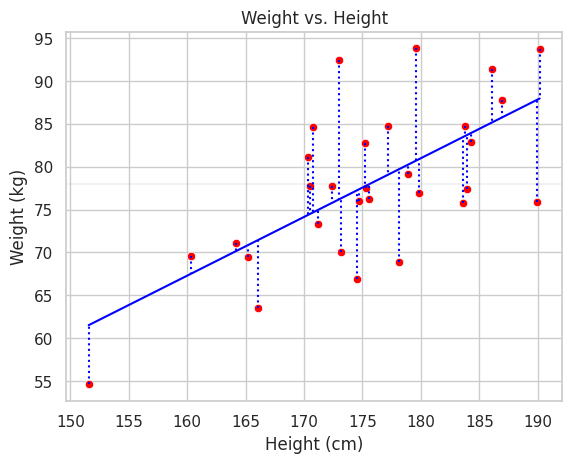

In [6]:
sns.scatterplot(x='Height', y='Weight', data=data, color='red')
sns.lineplot(x=data['Height'], y=weight_pred, color='blue')
plt.axhline(y=weight_mean, color='gray', alpha=0.1)
for i in range(n):
    plt.plot([data['Height'][i], data['Height'][i]], [data['Weight'][i], weight_pred[i]], color='blue', linestyle=':')
plt.title('Weight vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()


## Calculando R-squared
El cálculo de R-squared implica el numerador, que representa la diferencia entre la variación total y la variación residual. Esta diferencia se divide por la variación total. Dicha operación hace que R-squared oscile entre cero y uno, reflejando que la variación alrededor de la línea ajustada nunca excede la variación total y siempre es un valor no negativo. Este procedimiento también transforma R-squared en una métrica porcentual.

Ahora, veamos el ejemplo.

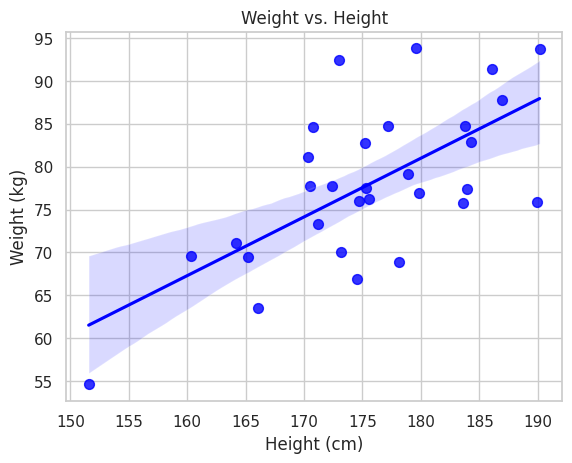

In [7]:
sns.regplot(x='Height', y='Weight', data=data, color='blue', scatter_kws={'s':50})
plt.title('Weight vs. Height')
plt.xlabel('Height (cm)')
plt.ylabel('Weight (kg)')
plt.show()

In [8]:
ss_tot = ((data['Weight'] - weight_mean) ** 2).sum()
ss_res = ((data['Weight'] - weight_pred) ** 2).sum()
r_squared = (ss_tot - ss_res) / ss_tot
ss_tot.round(2), ss_res.round(2), r_squared.round(3)

(2426.42, 1371.45, 0.435)

- La variación total alrededor de la media (suma de las diferencias al cuadrado entre el peso y la media) es aproximadamente 2.426,2.
- La variación alrededor de la línea azul (suma de las diferencias al cuadrado entre el peso y las predicciones de la línea de regresión) es 1.371,45, lo que confirma que se ajusta mucho mejor a los datos.
- Al aplicar estos valores en nuestra fórmula para R-squared obtenemos 0,435 (o 43,5%).

Esto indica que la línea azul explica aproximadamente el 43,5% de la variación en el peso, basado en su altura. Esto sugiere una correlación fuerte entre el peso y el altura.

## Comparando Variables Desvinculadas
Se analiza un ejemplo adicional comparando dos variables potencialmente no correlacionadas: el peso de un individuo en el eje Y y su tiempo de traslado al trabajo en el eje X.

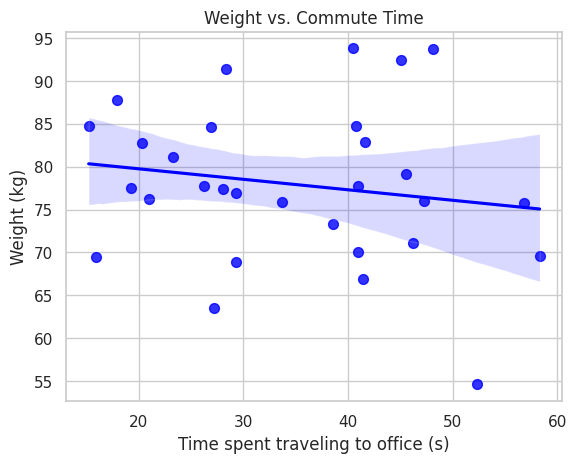

In [9]:
sns.regplot(x='Commute Time', y='Weight', data=data, color='blue', scatter_kws={'s':50})
plt.title('Weight vs. Commute Time')
plt.xlabel('Time spent traveling to office (s)')
plt.ylabel('Weight (kg)')
plt.show()

In [10]:
model_commute = LinearRegression()
model_commute.fit(data[['Commute Time']], data['Weight'])
weight_pred_commute = model_commute.predict(data[['Commute Time']])

ss_res_commute = ((data['Weight'] - weight_pred_commute) ** 2).sum()
r_squared_commute = (ss_tot - ss_res_commute) / ss_tot
ss_tot.round(2), ss_res_commute.round(2), r_squared_commute.round(3)

(2426.42, 2360.25, 0.027)

- Al igual que antes, la variación total alrededor de la media es aproximadamente 2.426,42.
- Pero esta vez, la variación alrededor de la línea azul es mucho mayor, aproximadamente 2.360,25.
- Al introducir estos valores en la fórmula de R-squared es aproximadamente 0,027 (o 2,7%), lo que indica que la relación entre el tiempo de viaje al trabajo y el peso sólo explica el 2,7% de la variación total.

Este resultado sugiere que la relación entre el peso y el tiempo dedicado a viajar al trabajo explica sólo el 2,7% de la variación en el peso. Esto indica una correlación muy débil o inexistente entre estas dos variables en los datos simulados, lo cual es coherente con el análisis.

## Conclusiones

El Coeficiente de Determinación R-squared se destaca en estadística por su habilidad para expresar qué proporción de la variación en una variable dependiente es explicada por las variables independientes en un modelo. Esta capacidad se traduce en una medida porcentual, proporcionando una comprensión clara y directa del grado en que las variables están correlacionadas. En comparación con otras métricas, como el Coeficiente de Correlación de Pearson r, R-squared aporta una visión más tangible y cuantificable sobre las relaciones entre variables.